In [11]:
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

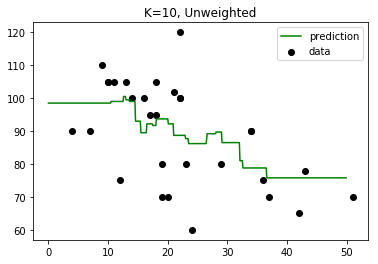

In [3]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

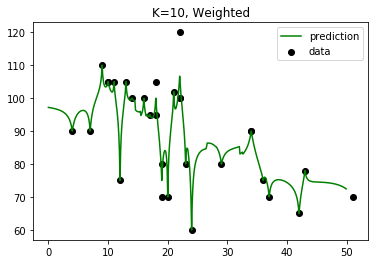

In [4]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [5]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with  𝑘  and weighting to see if you can do any better than we've done so far?

In [6]:
## Your model here.

In [7]:
def test_knn_model(k, weights, features, outcome):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights=weights)
    X = music[features]
    Y = music[outcome]
    knn.fit(X,Y)
    score = cross_val_score(knn, X, Y, cv=5)
    return score.max(), score.mean(), score.std() * 2


In [9]:
print("k=10")
print(test_knn_model(10, weights=None, features= ['loudness'], outcome='bpm'))
print(test_knn_model(10, weights='distance', features= ['loudness'], outcome='bpm'))

print("k=5")
print(test_knn_model(5, weights=None, features= ['loudness'], outcome='bpm'))
print(test_knn_model(5, weights='distance', features= ['loudness'], outcome='bpm'))

print("k=3")
print(test_knn_model(3, weights=None, features= ['loudness'], outcome='bpm'))
print(test_knn_model(3, weights='distance', features= ['loudness'], outcome='bpm'))

print("k=15")
print(test_knn_model(15, weights=None, features= ['loudness'], outcome='bpm'))
print(test_knn_model(15, weights='distance', features= ['loudness'], outcome='bpm'))

k=10
(0.26967692307692315, -0.18377021512626884, 0.6621527828699225)
(0.6158752287091404, 0.11087510468936353, 0.9407172574678859)
k=5
(0.6168615384615386, -0.284911883990614, 1.202258129228892)
(0.6976267213776487, 0.12205226886022927, 0.9317340164858028)
k=3
(0.5433333333333332, 0.06702344588937836, 0.6819550448892909)
(0.631613831523431, 0.13837979985211785, 0.8437399355734628)
k=15
(0.23342905982906004, -0.0854765961362868, 0.42334585059881663)
(0.5834368871317887, 0.1276043013931864, 0.7940664277806171)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 360x360 with 0 Axes>

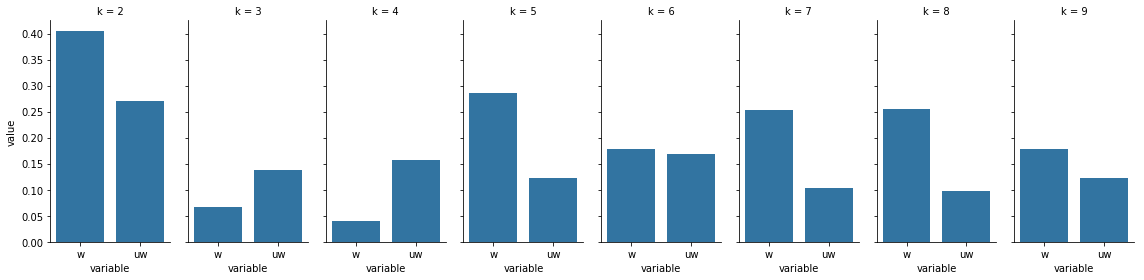

<Figure size 360x360 with 0 Axes>

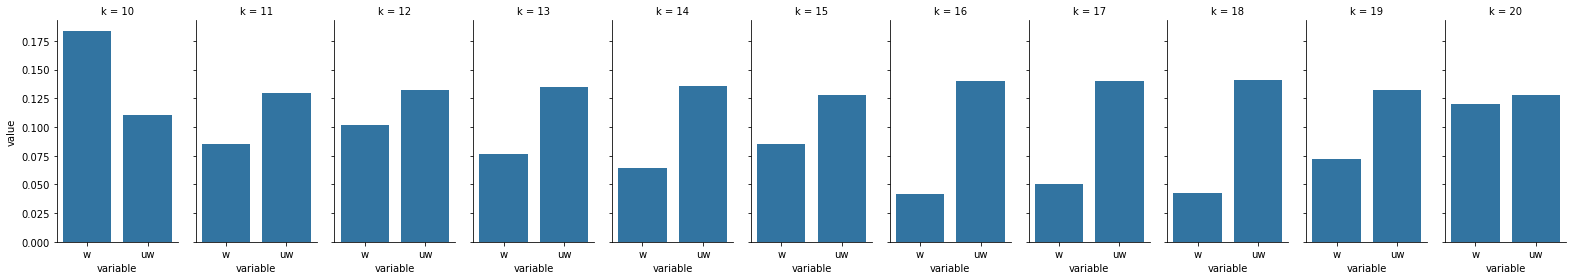

In [12]:
# plotting the data
kdataframe = pd.DataFrame()
kdataframe['k'] = np.arange(2,10,1)
kdataframe['w'] = [np.abs(test_knn_model(k, weights=None, features= ['loudness'], outcome='bpm')[1]) for k in range(2,10)]
kdataframe['uw'] = [np.abs(test_knn_model(k, weights='distance', features= ['loudness'], outcome='bpm')[1]) for k in range(2,10)]
melted = kdataframe.melt(id_vars='k')
plt.figure(figsize=(5, 5))
g = sns.FacetGrid(melted, col="k", height=4, aspect=.5)
g = g.map(sns.barplot, "variable", "value")

# plotting the data
kdataframe = pd.DataFrame()
kdataframe['k'] = np.arange(10,21)
kdataframe['w'] = [np.abs(test_knn_model(k, weights=None, features= ['loudness'], outcome='bpm')[1]) for k in range(10,21)]
kdataframe['uw'] = [np.abs(test_knn_model(k, weights='distance', features= ['loudness'], outcome='bpm')[1]) for k in range(10,21)]
melted = kdataframe.melt(id_vars='k')
plt.figure(figsize=(5, 5))
g = sns.FacetGrid(melted, col="k", height=4, aspect=.5)
g = g.map(sns.barplot, "variable", "value")

In [13]:
print("k=10")
print(test_knn_model(10, weights=None, features= ['duration','loudness'], outcome='bpm'))
print(test_knn_model(10, weights='distance', features= ['duration','loudness'], outcome='bpm'))
print("k=5")
print(test_knn_model(5, weights=None, features= ['duration','loudness'], outcome='bpm'))
print(test_knn_model(5, weights='distance', features= ['duration','loudness'], outcome='bpm'))
print("k=4")
print(test_knn_model(4, weights=None, features= ['duration','loudness'], outcome='bpm'))
print(test_knn_model(4, weights='distance', features= ['duration','loudness'], outcome='bpm'))
print("k=3")
print(test_knn_model(3, weights=None, features= ['duration','loudness'], outcome='bpm'))
print(test_knn_model(3, weights='distance', features= ['duration','loudness'], outcome='bpm'))
print("k=15")
print(test_knn_model(15, weights=None, features= ['duration','loudness'], outcome='bpm'))
print(test_knn_model(15, weights='distance', features= ['duration','loudness'], outcome='bpm'))

k=10
(0.02166017699115019, -0.42053273532520735, 0.7750546884663582)
(0.11602916162341559, -0.2648417229445579, 0.7418105662410748)
k=5
(0.03377699115044219, -0.7511262469479423, 1.1646251165144224)
(0.13069855140039588, -0.5087476842532577, 1.2417658099463726)
k=4
(-0.09586283185840716, -0.8443874457450846, 1.2549582086305613)
(0.05419451685791176, -0.6347594176144342, 1.6402846788808896)
k=3
(-0.12106194690265482, -0.6912989304575053, 1.0274076759802284)
(0.013282053254153992, -0.5866530100840501, 1.7469634773439637)
k=15
(-0.02000000000000024, -0.3791196958025394, 0.6527744595569747)
(0.0838198668230018, -0.23398053977130945, 0.6127617991507439)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 360x360 with 0 Axes>

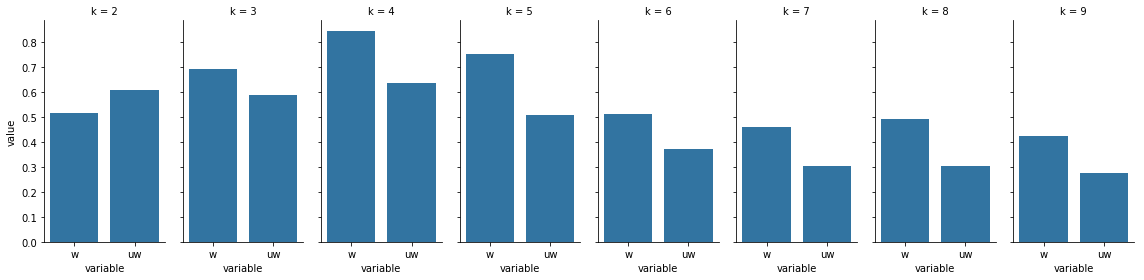

<Figure size 360x360 with 0 Axes>

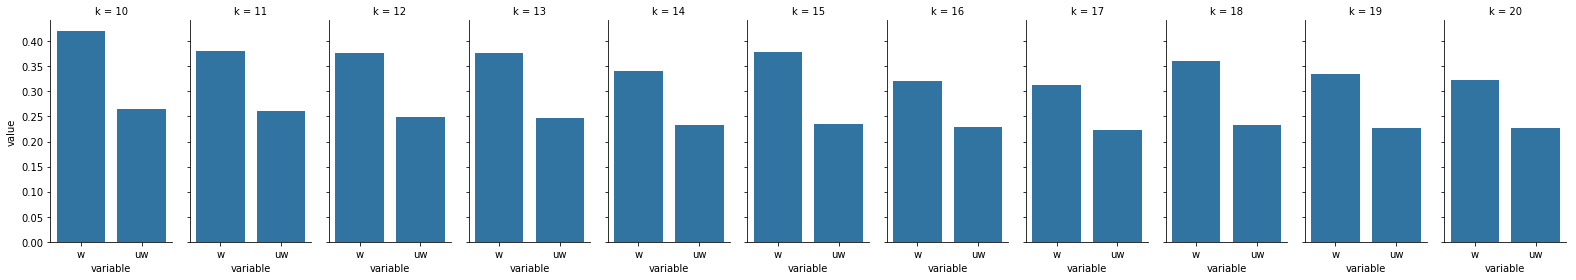

In [14]:
# plotting the data
kdataframe = pd.DataFrame()
kdataframe['k'] = np.arange(2,10,1)
kdataframe['w'] = [np.abs(test_knn_model(k, weights=None, features= ['duration','loudness'], outcome='bpm')[1]) for k in range(2,10)]
kdataframe['uw'] = [np.abs(test_knn_model(k, weights='distance', features= ['duration','loudness'], outcome='bpm')[1]) for k in range(2,10)]
melted = kdataframe.melt(id_vars='k')
plt.figure(figsize=(5, 5))
g = sns.FacetGrid(melted, col="k", height=4, aspect=.5)
g = g.map(sns.barplot, "variable", "value")

# plotting the data
kdataframe = pd.DataFrame()
kdataframe['k'] = np.arange(10,21)
kdataframe['w'] = [np.abs(test_knn_model(k, weights=None, features= ['duration','loudness'], outcome='bpm')[1]) for k in range(10,21)]
kdataframe['uw'] = [np.abs(test_knn_model(k, weights='distance', features= ['duration','loudness'], outcome='bpm')[1]) for k in range(10,21)]
melted = kdataframe.melt(id_vars='k')
plt.figure(figsize=(5, 5))
g = sns.FacetGrid(melted, col="k", height=4, aspect=.5)
g = g.map(sns.barplot, "variable", "value")